## Make the overall IEQ Graphic

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from influxdb import DataFrameClient
import pytz
import seaborn as sns
import json
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_excel("IEQ comparison of old, new and CBE database.xlsx", index_col='Unnamed: 0')

In [4]:
data.head()

,Old Space,CBE Database Average,3for2 space
General Building Satisfaction,1.04,1.07,1.36
General Workplace Satisfaction,1.07,0.97,1.40
Acoustic quality,0.97,-0.12,0.60
Air Quality,0.35,0.45,1.50
Clenliness and Maintainance,0.85,1.10,1.36


In [5]:
data.columns = ["Previous Office","CBE Database Average","3for2 Space"]
data = data[["CBE Database Average","Previous Office","3for2 Space"]]

In [6]:
unstacked = data.unstack()

In [7]:
unstacked = unstacked.reset_index()

In [8]:
unstacked

,level_0,level_1,0
0,CBE Database Average,General Building Satisfaction,1.07
1,CBE Database Average,General Workplace Satisfaction,0.97
2,CBE Database Average,Acoustic quality,-0.12
3,CBE Database Average,Air Quality,0.45
4,CBE Database Average,Clenliness and Maintainance,1.10
5,CBE Database Average,Lighting,1.15
6,CBE Database Average,Office Furnishings,0.90
7,CBE Database Average,Office Layout,0.96
8,CBE Database Average,Thermal Comfort,0.06
9,Previous Office,General Building Satisfaction,1.04


In [9]:
unstacked.columns = ['Space','Metric','Occupant Perception']

In [10]:
import matplotlib.pyplot as plt

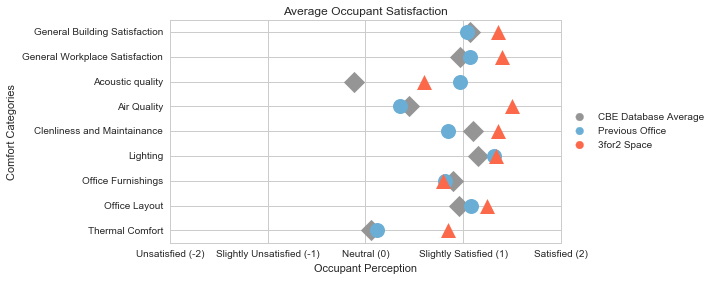

In [11]:
fig1 = plt.figure(figsize=[7,4])
sns.set(style="whitegrid")
# sns.axes_style("whitegrid")
cbe = unstacked[(unstacked['Space']=='CBE Database Average')]
ax = sns.stripplot(x="Occupant Perception", y="Metric", hue="Space", data=cbe, size=15, palette='Greys', marker='D')

prev = unstacked[(unstacked['Space']=='Previous Office')]
ax = sns.stripplot(x="Occupant Perception", y="Metric", hue="Space", data=prev, size=15, palette='Blues')

new = unstacked[(unstacked['Space']=='3for2 Space')]
ax = sns.stripplot(x="Occupant Perception", y="Metric", hue="Space", data=new, size=15, palette='Reds', marker='^')

plt.ylabel("Comfort Categories")
plt.xlim(-2,2)
# sns.despine(offset=10, trim=True)

sns.plt.legend(loc='center left',bbox_to_anchor=(1,0.5))#
# labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['Unsatisfied (-2)','Slightly Unsatisfied (-1)','Neutral (0)','Slightly Satisfied (1)','Satisfied (2)']
#plt.xticks(labels)
plt.locator_params(nbins=5, axis='x')
ax.set_title("Average Occupant Satisfaction")
ax.set_xticklabels(labels)
ax.yaxis.grid()
plt.savefig("./figures/Comparison_IEQ.pdf", bbox_inches='tight');

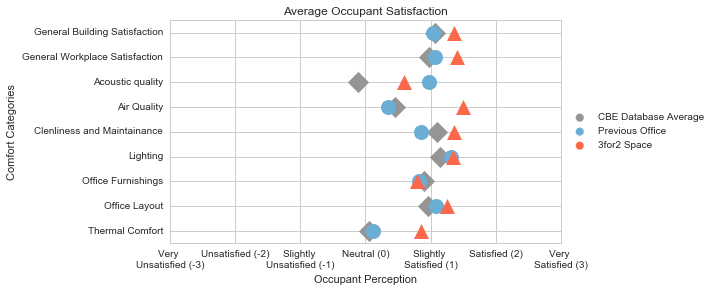

In [19]:
fig1 = plt.figure(figsize=[7,4])
sns.set(style="whitegrid")
# sns.axes_style("whitegrid")
cbe = unstacked[(unstacked['Space']=='CBE Database Average')]
ax = sns.stripplot(x="Occupant Perception", y="Metric", hue="Space", data=cbe, size=15, palette='Greys', marker='D')

prev = unstacked[(unstacked['Space']=='Previous Office')]
ax = sns.stripplot(x="Occupant Perception", y="Metric", hue="Space", data=prev, size=15, palette='Blues')

new = unstacked[(unstacked['Space']=='3for2 Space')]
ax = sns.stripplot(x="Occupant Perception", y="Metric", hue="Space", data=new, size=15, palette='Reds', marker='^')

plt.ylabel("Comfort Categories")
plt.xlim(-3,3)
# sns.despine(offset=10, trim=True)

sns.plt.legend(loc='center left',bbox_to_anchor=(1,0.5))#
# labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['Very \nUnsatisfied (-3)','Unsatisfied (-2)','Slightly \nUnsatisfied (-1)','Neutral (0)','Slightly \nSatisfied (1)','Satisfied (2)','Very \nSatisfied (3)']
#plt.xticks(labels)
plt.locator_params(nbins=7, axis='x')
ax.set_title("Average Occupant Satisfaction")
ax.set_xticklabels(labels)
ax.yaxis.grid()
plt.savefig("./figures/Comparison_IEQ.pdf", bbox_inches='tight');

http://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend

# Let's try the regular scatterplot

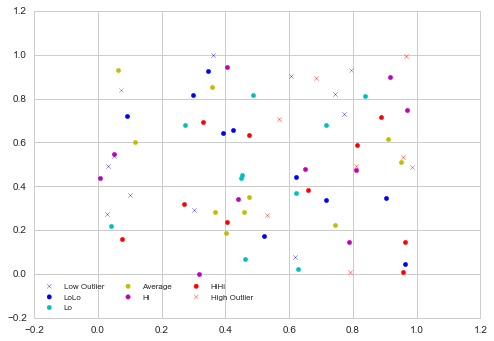

In [35]:
import matplotlib.pyplot as plt
from numpy.random import random

colors = ['b', 'c', 'y', 'm', 'r']

lo = plt.scatter(random(10), random(10), marker='x', color=colors[0])
ll = plt.scatter(random(10), random(10), marker='o', color=colors[0])
l  = plt.scatter(random(10), random(10), marker='o', color=colors[1])
a  = plt.scatter(random(10), random(10), marker='o', color=colors[2])
h  = plt.scatter(random(10), random(10), marker='o', color=colors[3])
hh = plt.scatter(random(10), random(10), marker='o', color=colors[4])
ho = plt.scatter(random(10), random(10), marker='x', color=colors[4])

plt.legend((lo, ll, l, a, h, hh, ho),
           ('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()


In [50]:
data = data.T

General Building Satisfaction     1.07
General Workplace Satisfaction    0.97
Acoustic quality                 -0.12
Air Quality                       0.45
Clenliness and Maintainance       1.10
Lighting                          1.15
Office Furnishings                0.90
Office Layout                     0.96
Thermal Comfort                   0.06
Name: CBE Database Average, dtype: float64

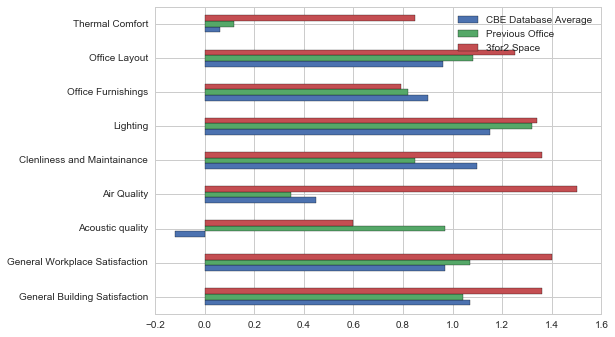

In [59]:
colors = ['b', 'c', 'y', 'm', 'r']

data.T.plot(kind='barh')

# lo = plt.scatter(data['CBE Database Average'], data.index, marker='x', color=colors[0])
# ll = plt.scatter(random(10), random(10), marker='o', color=colors[0])
# l  = plt.scatter(random(10), random(10), marker='o', color=colors[1])

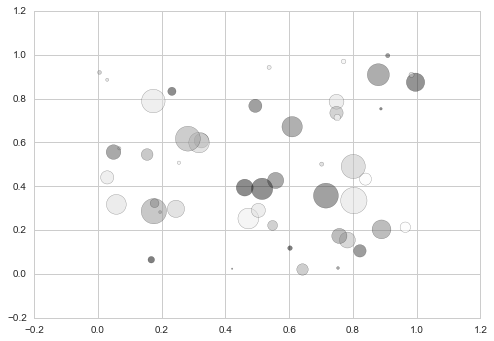

In [13]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [14]:
colors

array([ 0.80632136,  0.91495356,  0.03142949,  0.47476773,  0.45589188,
        0.9975323 ,  0.78676231,  0.57807397,  0.7532141 ,  0.22896676,
        0.73272092,  0.33069404,  0.25323636,  0.78961526,  0.41194043,
        0.1315736 ,  0.51505115,  0.36159436,  0.87394471,  0.29098577,
        0.89330499,  0.22201194,  0.85819106,  0.44005489,  0.59238702,
        0.22131122,  0.90645921,  0.59094199,  0.73804644,  0.99198881,
        0.32951534,  0.5677088 ,  0.47384003,  0.03143675,  0.35043918,
        0.50511105,  0.48453226,  0.15568567,  0.30092225,  0.44863503,
        0.23134497,  0.16832157,  0.01040551,  0.22630878,  0.74361529,
        0.81820306,  0.69161426,  0.24070867,  0.71070258,  0.33975278])

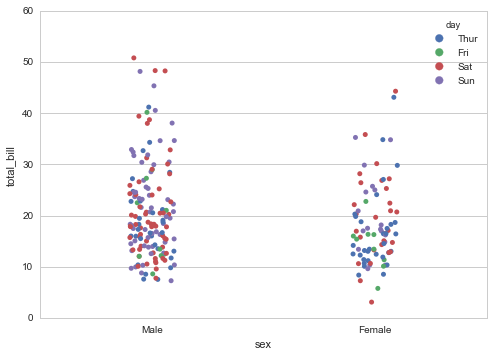

In [53]:
import seaborn as sns
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.stripplot(x="sex", y="total_bill", hue="day", data=tips, jitter=True)

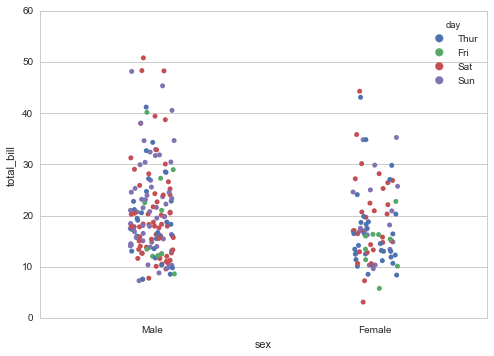